## Chapter 2 지도 학습
+ 지도 학습에서는 분류(classfication)와 회귀(regression)
+ 분류는 미리 정의된, 가능성이 있는 여러 클래스 레이블(class label) 중 하나를 예측하는 것
  - 딱 두 개의 클래스로 분류 하는 이진 분류(binary classification)
  - 셋 이상의 클래스로 분류하는 다중 분류(multiclass classfication)
+ 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트으로 일반화(generalization)되었다고 한다.
+ 과대적합(overfitting)
  - 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것
+ 과소적합(underfitting)
  - 너무 간단한 모델이 선택되는 것
+ 모델 복잡도에 따른 훈련과 테스트 정확도의 변화
  ![그림 2-1](./image/fig2-01.png)

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import mglearn

## 지도 학습 알고리즘

### 두 개의 특성을 가진 forge 데이터셋: 이진 분류 데이터셋

X.shape: (26, 2)


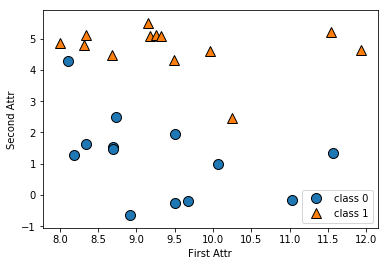

In [16]:
# make data sets
X, y = mglearn.datasets.make_forge()


# draw a scatter plot
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("First Attr")
plt.ylabel("Second Attr")
print("X.shape: {}".format(X.shape))

### 특성 하나와 모델링할 타깃 변수(또는 응답), 회귀 알고리즘

Text(0,0.5,'target')

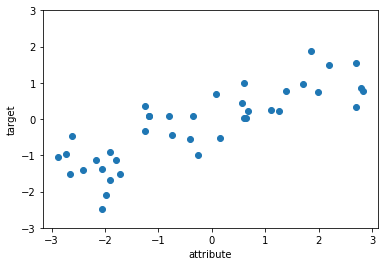

In [18]:
# make data sets
X, y = mglearn.datasets.make_wave(n_samples=40)


# draw a scatter plot
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("attribute")
plt.ylabel("target")

> Note
  특성이 적은 데이터셋(저차원 데이터셋)에서 얻은 직관이 특성이 많은 데이터셋(고차원 데이터셋)에서 그대로 유지되지 않을 수 있다.

### 기타 데이터셋
+ 인위적인 소규모 데이터셋 외에 scikit-learn에 들어 있는 실제 데이터셋도 두 개를 사용
  - 이진 분류 데이터셋
    * 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 데이터셋
      * 각 종양은 양성(benign)과 악성(malignant)으로 레이블되어 있고, 조직 데이터를 기반으로 종양이 악성인지를 예측한다.
  - 회귀 분석 데이터셋
    * 보스턴 주택 가격(Boston Housing) 데이터셋을 사용을 하며, 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변의 주택 평균 가격을 예측하는 것

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [20]:
print("유방암 데이터의 형태: {}".format(cancer.data.shape))

유방암 데이터의 형태: (569, 30)


In [22]:
print("클래스별 샘플 개수:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


In [23]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [24]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


### k-최근접 이웃

#### k-최근접 이웃 분류
+ 이웃이 1인 경우라면 거리가 첫 번째로 가까운 이웃을 보고 신규 데이터를 분류
+ 이웃이 3인 경우라면 거리가 세 번째로 가까운 이웃을 보고 신규 데이터를 분류한다. 이떄 그룹이 갈리면 다슈결의 원칙에 따른다.
+ 참고 사이트
  - http://kkokkilkon.tistory.com/14
  - http://www.sturdylad.co.kr/scikit-learn-model-evaluation/

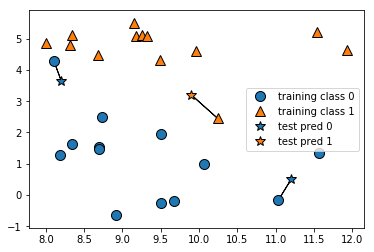

In [25]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

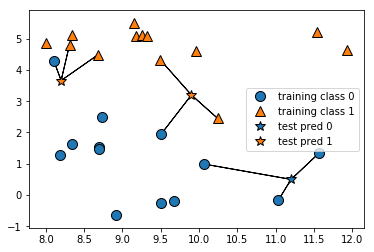

In [26]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [30]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [32]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [34]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86
